In [2]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1 = finesse.kat()

kat.verbose=True

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
kat.parse("""


l laser 1 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  

mod sb1 55.5556M 0.3 1 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 refl                     #space b/w mod and PRM      ---> REFL <---

m ITM 0.98997 0.01 0 refl n4              #ITM
s ARM 3.3 n4 n5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 n5 n6           #ETM


pd trans n6
pd circ n4
pd refl refl 


pd1 refl_I 55.5556M 0 refl
pd1 refl_Q 55.5556M 90 refl 

pd1 trans_I 55.5556M 0 n6
pd1 trans_Q 55.5556M 90 n6 


xaxis ETM phi lin -28 28 3500         


""")

--------------------------------------------------------------
Running kat - Started at 2022-06-20 00:46:15.102844
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.204492 seconds

--- Output info ---

Run date and time: 2022-06-20 00:46:15.102843
Detectors used: circ, refl, refl_I, refl_Q, trans, trans_I, trans_Q

One xaxis used: ['xaxis ETM phi lin -28 28 3500']
trans   : min = 1.220689634586520e-07 max = 3.751343047412010e-03
circ    : min = 1.220689634586520e-02 max = 3.751343047412010e+02
refl    : min = 9.734610767705670e-01 max = 9.997191734731580e-01
refl_I  : min = -2.414786681689970e-01 max = 2.414786681671180e-01
refl_Q  : min = -1.569088173347670e-01 max = 1.569088173318740e-01
trans_I : min = -1.216644358269230e-06 max = 1.216644361531830e-06
trans_Q : min = -1.872554675171370e-06 max = 1.872554676180080e-06


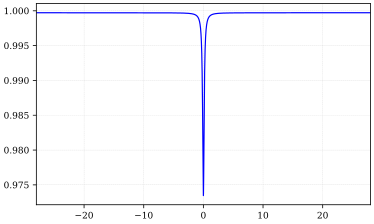

In [3]:
out = kat.run()
out.info()
plt.plot(out.x,out['refl'])

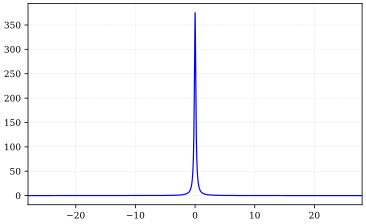

In [4]:
plt.plot(out.x,out['circ'])

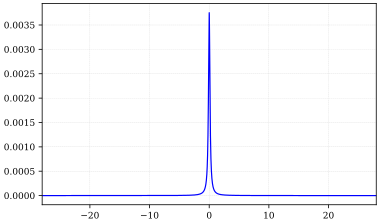

In [5]:
plt.plot(out.x,out['trans'])

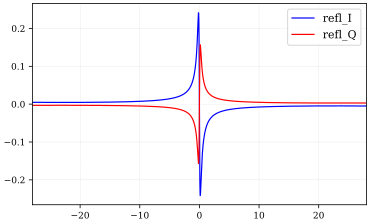

In [6]:
plt.plot(out.x,out['refl_I'],label="refl_I")
plt.plot(out.x,out['refl_Q'],label="refl_Q")
plt.legend()
plt.show()

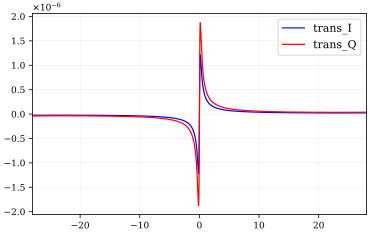

In [7]:
plt.plot(out.x,out['trans_I'],label="trans_I")
plt.plot(out.x,out['trans_Q'],label="trans_Q")
plt.legend()
plt.show()

kat1.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
noplot z % Don't plot the feedback signal
%xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

out = kat1.run()
out.info()
out.plot()

In [8]:
kat2 = finesse.kat()
kat2.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd circ n5
pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

#set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
#lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
#put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
#noplot z % Don't plot the feedback signal
#xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 800 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

--------------------------------------------------------------
Running kat - Started at 2022-06-20 00:46:18.109494


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.04652 seconds

--- Output info ---

Run date and time: 2022-06-20 00:46:18.117548
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 800']
PDrefl   : min = -4.563522330770260e-06 max = 4.433681008126370e-05
circ     : min = 8.626061878040620e-03 max = 8.999995501188940e+01
QPDrefl1 : min = -4.281475353164480e-06 max = 1.413768540821180e-06
QPDrefl2 : min = -2.664070193963450e-06 max = 2.192754281934620e-06


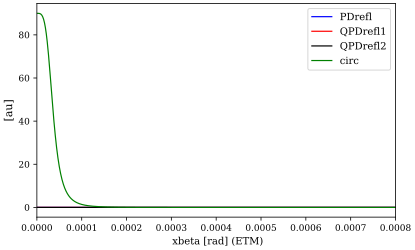

In [9]:
out1 = kat2.run()
out1.info()
out1.plot()

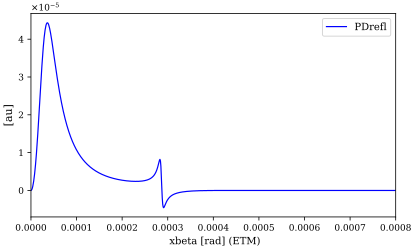

In [10]:
out1.plot(['PDrefl'])

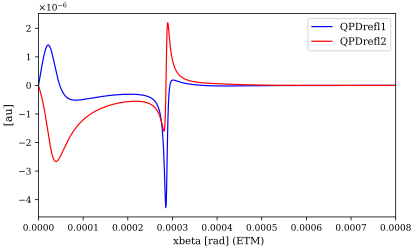

In [11]:
out1.plot(['QPDrefl1','QPDrefl2'])

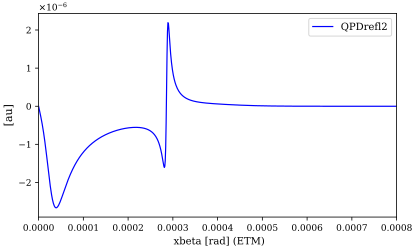

In [12]:
out1.plot(['QPDrefl2'])

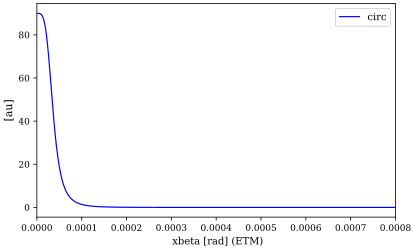

In [13]:
out1.plot(['circ'])

In [26]:
kat3 = finesse.kat()
kat3.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
noplot z % Don't plot the feedback signal
%xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-20 00:50:06.855479


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 20.0536 seconds

--- Output info ---

Run date and time: 2022-06-20 00:50:06.856450
Detectors used: PDrefl, QPDrefl1, QPDrefl2, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 500']
PDrefl   : min = -2.709956641418250e-10 max = 9.999899532484640e-09
QPDrefl1 : min = -5.420913402927840e-09 max = 1.241783090838710e-05
QPDrefl2 : min = -6.474722901332150e-06 max = 6.797141649720540e-10
z        : min = 0.000000000000000e+00 max = 4.610126023729700e+01


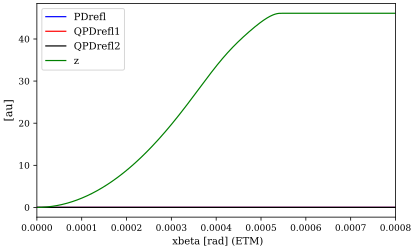

In [27]:
out2 = kat3.run()
out2.info()
out2.plot()

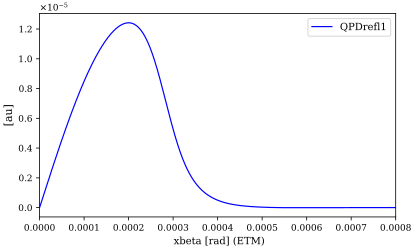

In [30]:
out2.plot(['QPDrefl1'])

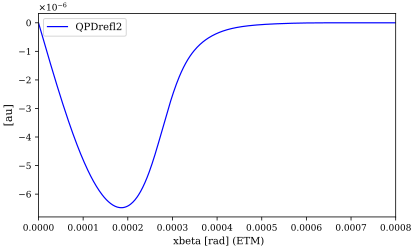

In [31]:
out2.plot(['QPDrefl2'])

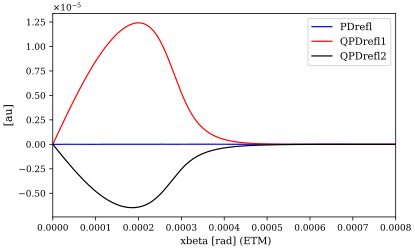

In [32]:
out2.plot(['QPDrefl1','QPDrefl2','PDrefl'])

In [13]:
kat4 = finesse.kat()
kat4.parse("""


l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 
maxtem 3 
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 

s s2 0.1 n7 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump
s sQPD1 0.1 n9 n11  
s sQPD2 0.1 n10 n12 

cav cavity ITM n5 ETM n6 
trace 2
attr ETM Rc 1.3  
attr ETM xbeta 0 
attr ITM xbeta 0 
pd1 PDrefl 15M 10 n4 
pd1 PDtrans 15M 30 n7
pd PDtrans1 n7
attr sQPD1 g 40   
attr sQPD2 g 130 

pd1 QPDtrans1 15M 35 n11
pdtype QPDtrans1 x-split
 
 
pd1 QPDtrans2 15M 125 n12 
pdtype QPDtrans2 x-split  

set err PDrefl re 
lock z $err 3000 10n 
put ETM phi $z 
noplot z 
#xaxis ITM xbeta lin 0 0.8m 500 
xaxis ETM xbeta lin 0 0.8m 500
#xaxis ITM phi lin 0 -30 500 
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-24 12:51:44.123971


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 28.1869 seconds

--- Output info ---

Run date and time: 2022-06-24 12:51:44.126089
Detectors used: PDrefl, PDtrans, PDtrans1, QPDtrans1, QPDtrans2, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 500']
PDrefl    : min = -6.719945472182780e-09 max = 9.999113111186621e-09
PDtrans   : min = -7.574405538243430e-10 max = 1.717242268226580e-07
PDtrans1  : min = 9.000242339213329e-05 max = 8.999995501188940e-01
QPDtrans1 : min = -6.351856204221500e-07 max = 0.000000000000000e+00
QPDtrans2 : min = -1.008805073463720e-07 max = 2.644696795595820e-07
z         : min = 0.000000000000000e+00 max = 4.772506405677600e+01


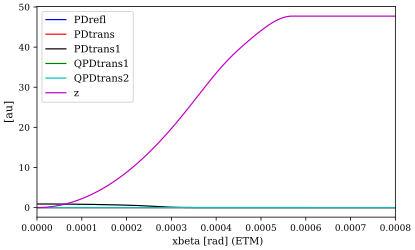

In [14]:
out3 = kat4.run()
out3.info()
out3.plot()

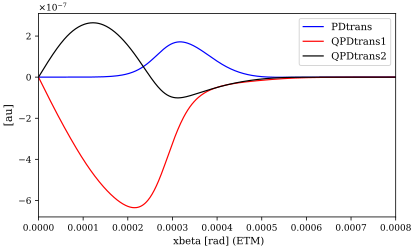

In [19]:
out3.plot(['QPDtrans1','QPDtrans2','PDtrans'])

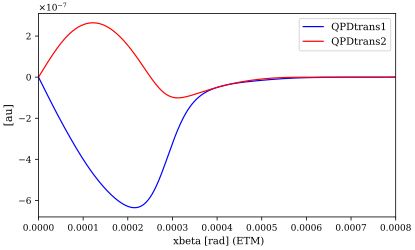

In [20]:
out3.plot(['QPDtrans1','QPDtrans2'])

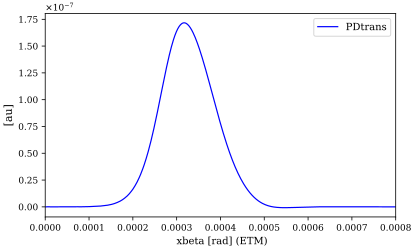

In [21]:
out3.plot(['PDtrans'])

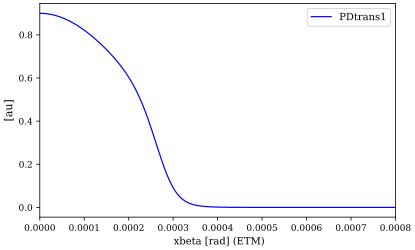

In [22]:
out3.plot(['PDtrans1'])